In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv('neo.csv')

In [4]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

<Axes: >

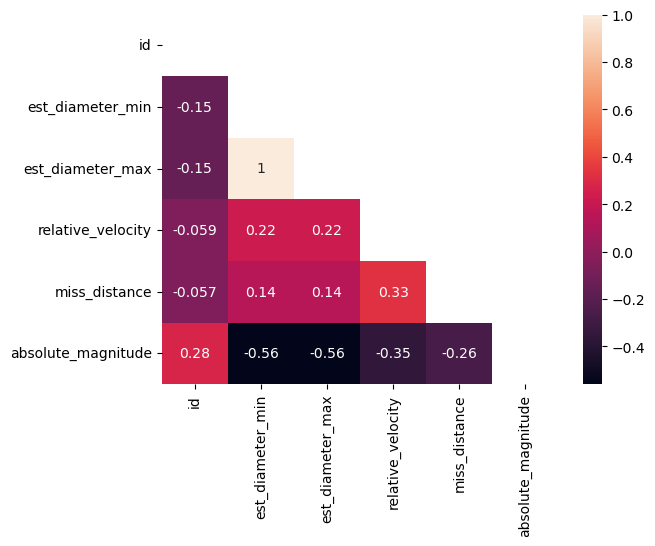

In [8]:
df_numeric = df.select_dtypes(include=[np.number])
mask = np.triu(np.ones_like(df_numeric.corr(), dtype=bool))
sns.heatmap(df_numeric.corr(), mask=mask, annot=True)


In [6]:
# remove those two columns
df = df.drop(['orbiting_body','sentry_object'], axis=1)
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


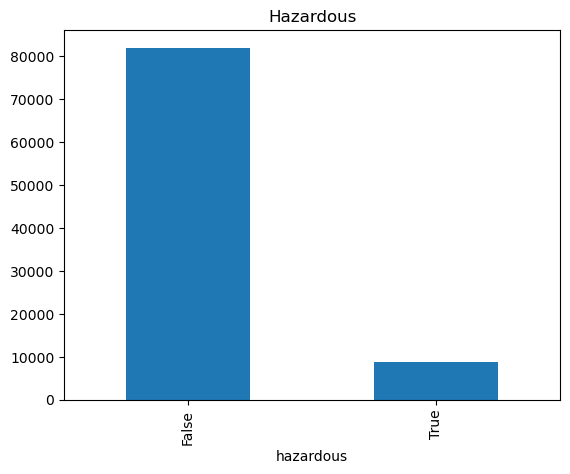

In [10]:
# plot distribution of Hazardous
df.hazardous.value_counts().plot(kind='bar')
plt.title('Hazardous')
plt.show()

In [11]:
# Separate Numeric Data 
numeric_df = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
df[numeric_df].describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [12]:
# Separate Numeric Data 
numeric_df = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
df[numeric_df].describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


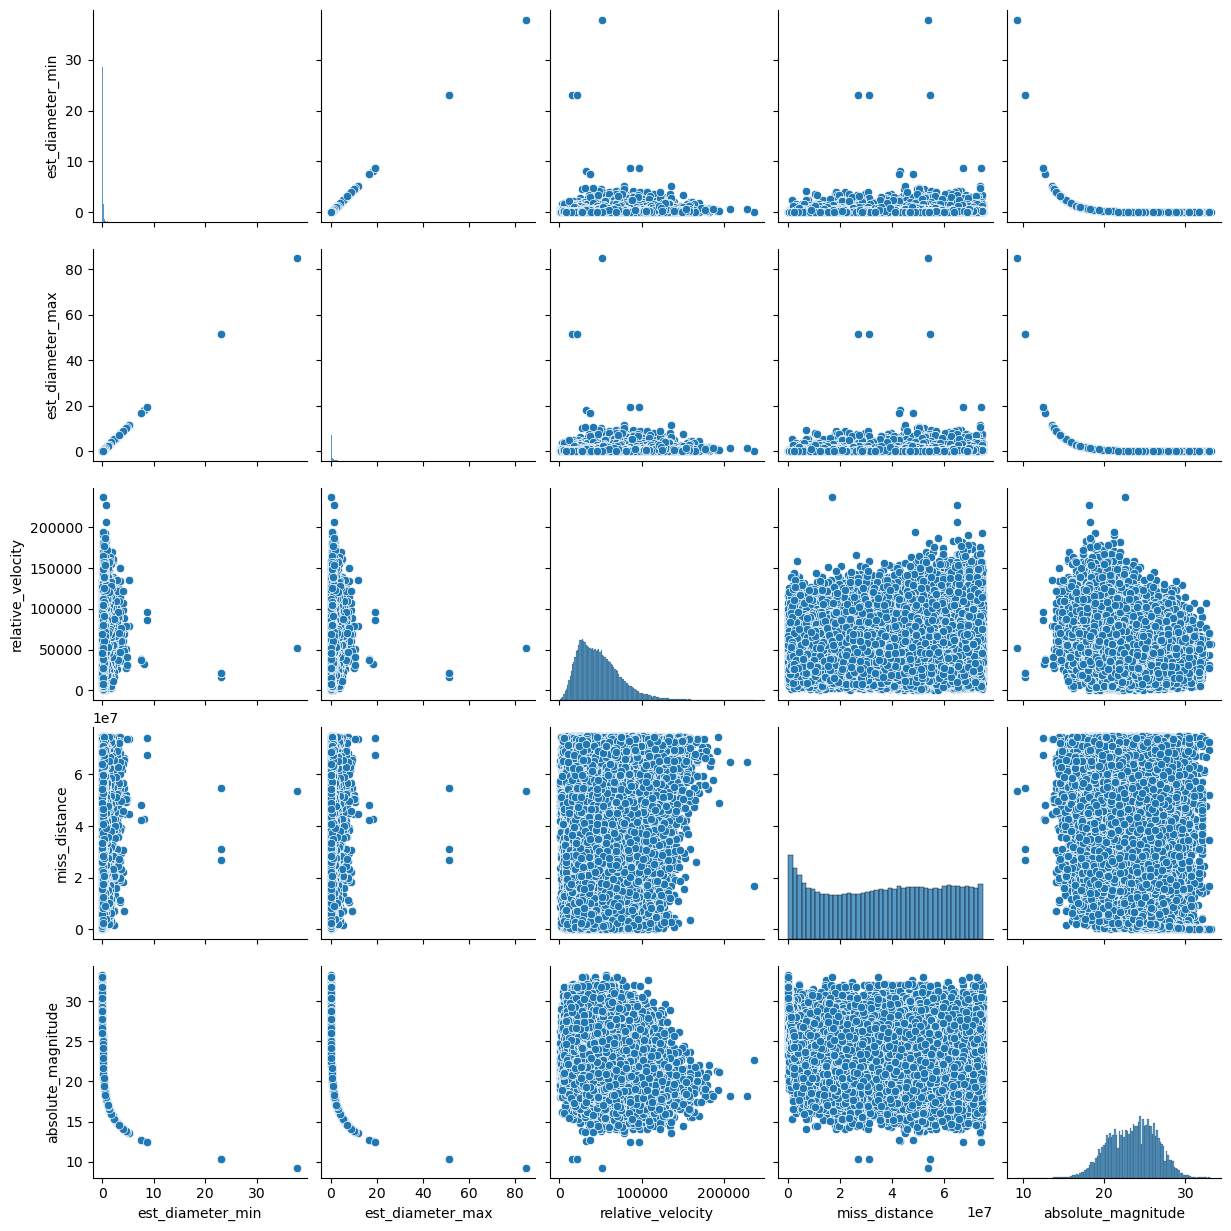

In [13]:
# create pairplot To plot multiple pairwise bivariate distributions in a dataset
fig= sns.pairplot(df[numeric_df])

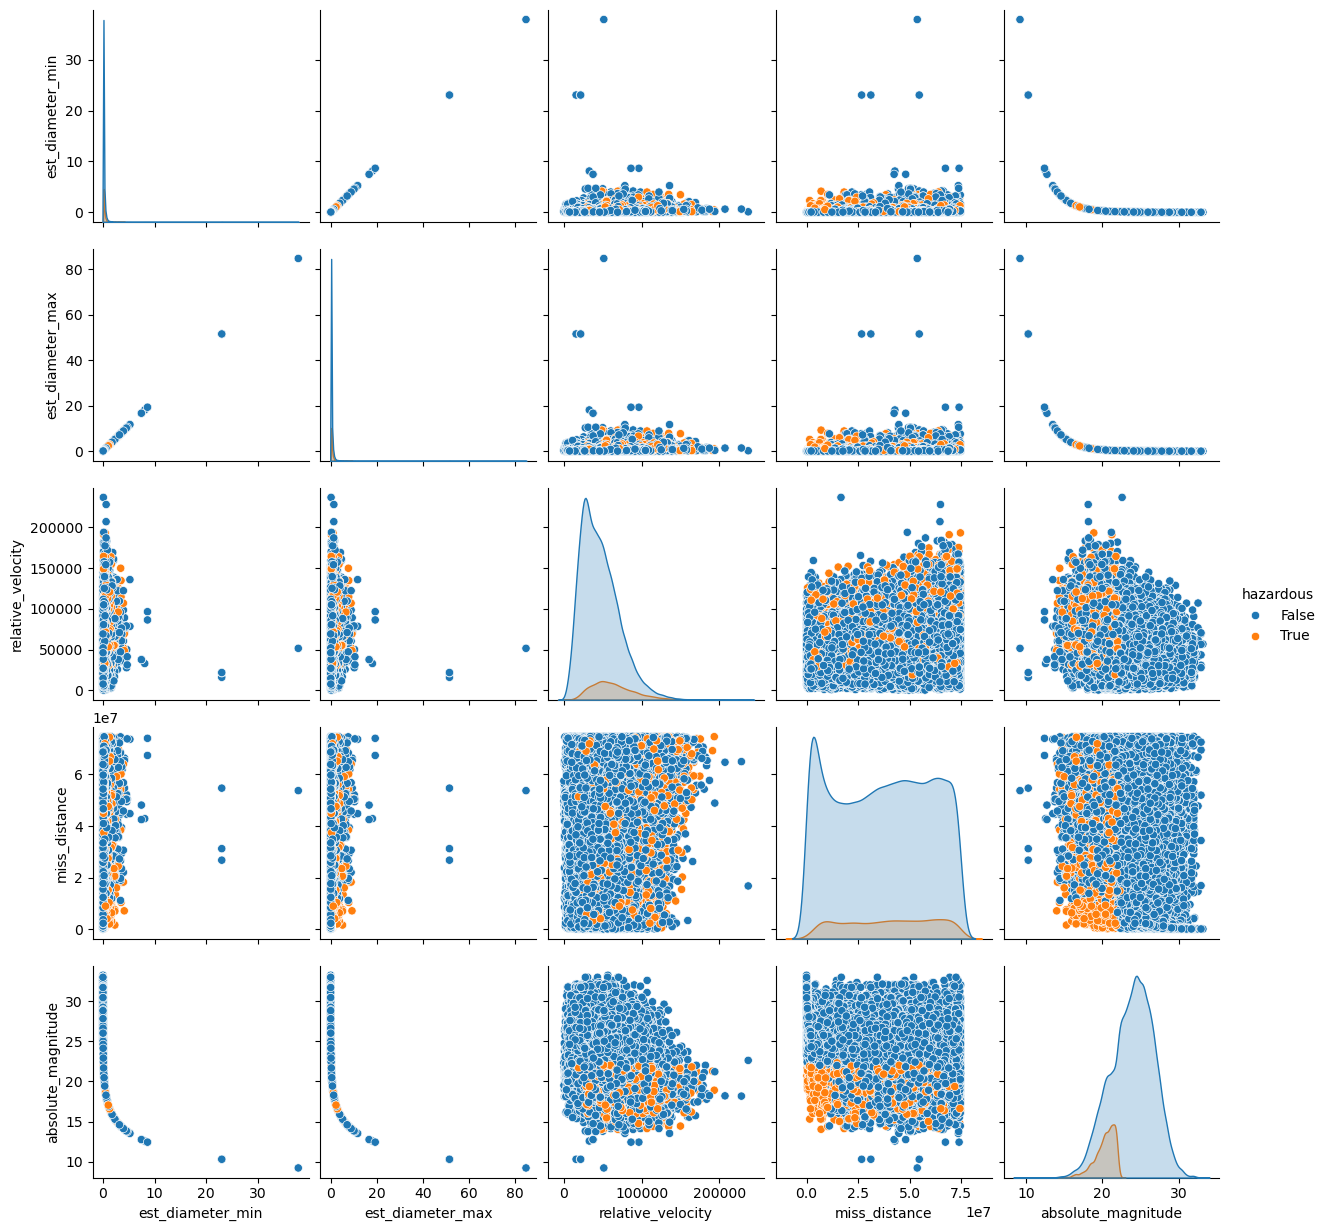

In [14]:
# create pairplot To plot multiple pairwise bivariate distributions with hazardous
fig= sns.pairplot(df[numeric_df+['hazardous']],hue = 'hazardous')

### it shows that hazardious objects are in clusters

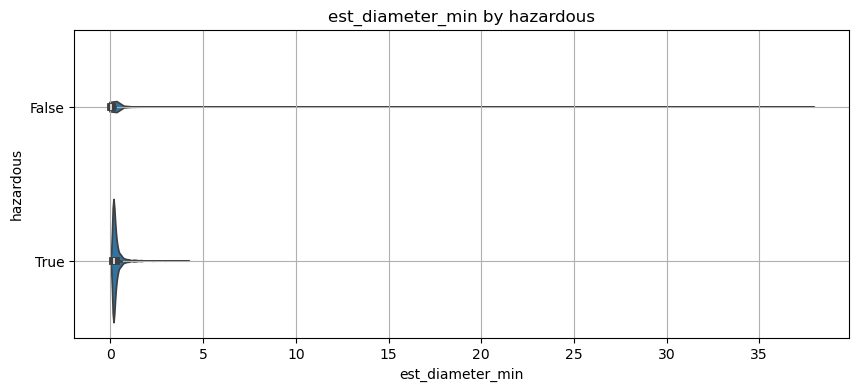

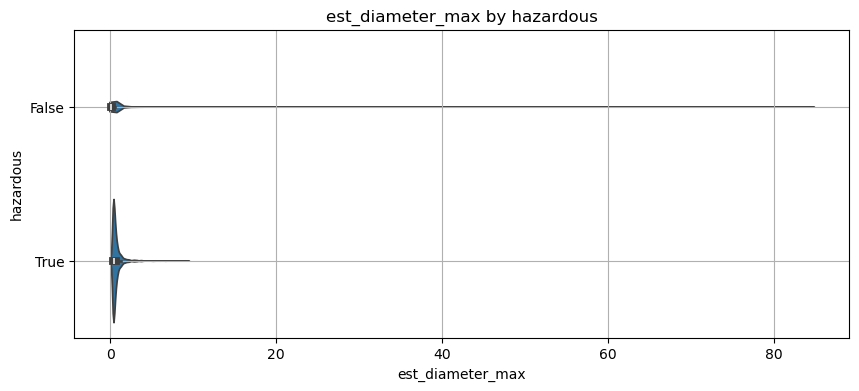

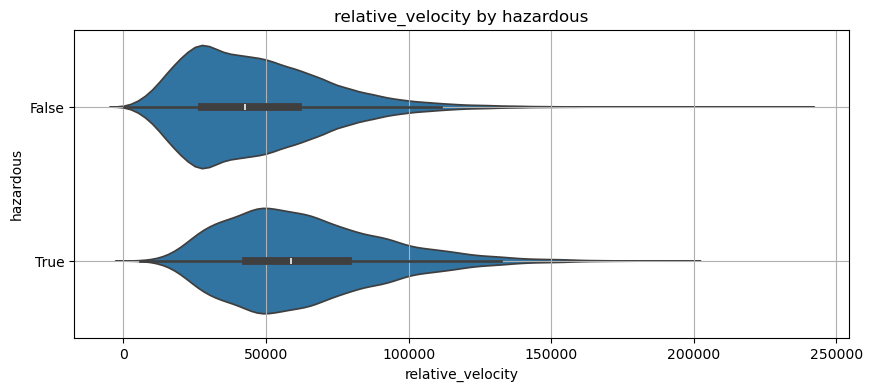

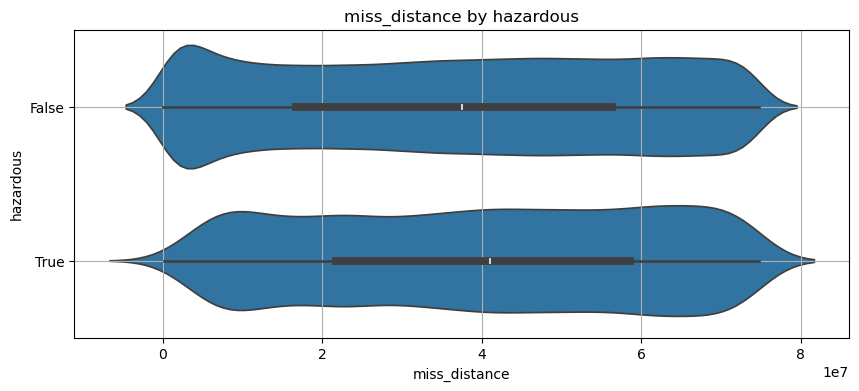

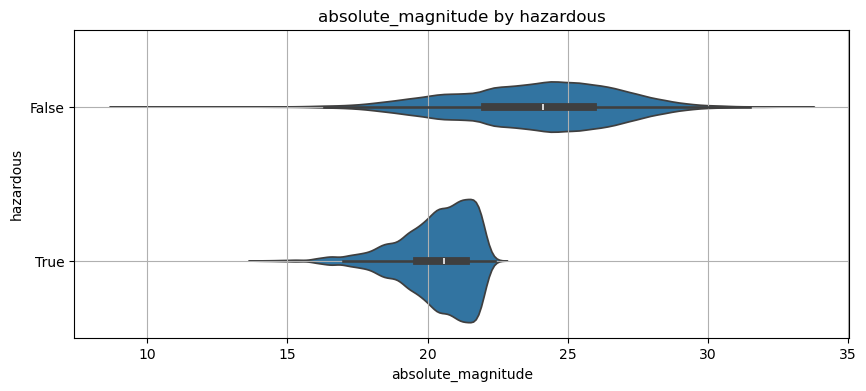

In [15]:
for k in numeric_df:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df, x=k, y='hazardous', orient='h')
    title = k + ' by hazardous'
    plt.title(title)
    plt.grid()

In [7]:
# Split into x and y ,Irrelevant features dropped
#x = df.drop(["id","name",'hazardous',"miss_distance","absolute_magnitude"] , axis = 1)
x = df[['est_diameter_min', 'est_diameter_max', 'relative_velocity']]

In [5]:
x.head()

,est_diameter_min,est_diameter_max,relative_velocity,est_diameter_min
0,1.198271,2.679415,13569.249224,1.198271
1,0.265800,0.594347,73588.726663,0.265800
2,0.722030,1.614507,114258.692129,0.722030
3,0.096506,0.215794,24764.303138,0.096506
4,0.255009,0.570217,42737.733765,0.255009


In [8]:
# Hazardous Transformed into int
y = df['hazardous'].astype("int")
print(x.shape, y.shape)


(90836, 3) (90836,)


In [9]:
# Train & Test Splitting
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [10]:
# KNN Model
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
Acc_KNN = round(accuracy_score(KNN_pred, y_test) * 100, 2)
print(Acc_KNN)

87.7


In [11]:
# RandomForst Model
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
Acc_RF = round(accuracy_score(RF_pred, y_test) * 100, 2)
print(Acc_RF)

89.68


In [12]:
# Gaussian Naive Bayes Model
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_pred = GNB.predict(X_test)
Acc_GNB = round(accuracy_score(GNB_pred,y_test) * 100, 2)
print(Acc_GNB)

89.29


In [13]:
# DecisionTree Model

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTC_pred = DTC.predict(X_test)
Acc_DTC = round(accuracy_score(DTC_pred, y_test) * 100, 2)
print(Acc_DTC)

89.0


In [14]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'Gaussian Naive Bayes', 
              'KNeighborsClassifier', 'DecisionTreeClassifier'],
    'Score': [Acc_RF, Acc_GNB, 
              Acc_KNN, Acc_DTC]})
a = models.sort_values(by='Score', ascending=False)

([0, 1, 2, 3],
 [Text(0, 0, 'Random Forest'),
  Text(1, 0, 'Gaussian Naive Bayes'),
  Text(2, 0, 'KNeighborsClassifier'),
  Text(3, 0, 'DecisionTreeClassifier')])

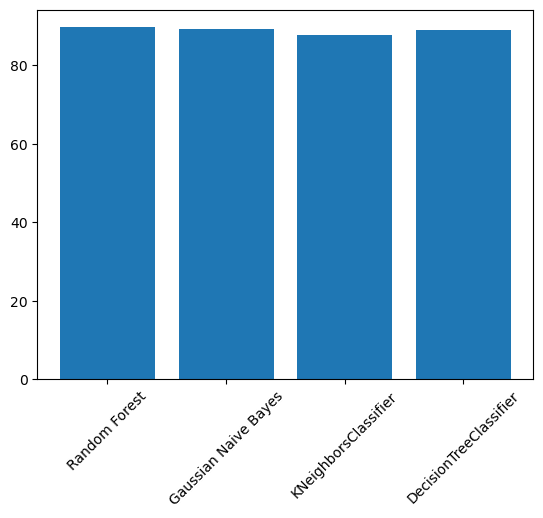

In [15]:
plt.bar(models['Model'], models['Score'])
plt.xticks(rotation = 45)

### Best performance: RANDOM FOREST

In [16]:
# performances in sorted way
a

,Model,Score
0,Random Forest,89.68
1,Gaussian Naive Bayes,89.29
3,DecisionTreeClassifier,89.00
2,KNeighborsClassifier,87.70


In [17]:
import numpy as np


nan_indices_train = np.isnan(X_train)
nan_indices_test = np.isnan(X_test)


X_train[nan_indices_train] = np.nanmean(X_train)
X_test[nan_indices_test] = np.nanmean(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier
classification = RandomForestClassifier(n_estimators = 100, min_samples_split=4, random_state = 0)
classification.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=4, random_state=0)

In [19]:
y_pred = classification.predict(X_test)

print(y_pred)

[0 0 0 ... 0 0 0]


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

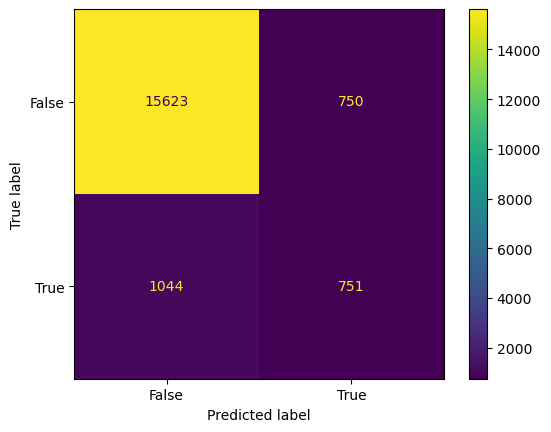

In [21]:
classes= df['hazardous'].unique()

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot()

plt.show()

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")


f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.9012549537648613
Precision: 0.8941828339054579
Recall: 0.9012549537648613
F1 Score: 0.8972903044107664
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     16373
           1       0.50      0.42      0.46      1795

    accuracy                           0.90     18168
   macro avg       0.72      0.69      0.70     18168
weighted avg       0.89      0.90      0.90     18168



## Hence the best accuracy is obtained from RANDOM FOREST MACHINE LEARNING MODEL

In [25]:
answers = []
for i, j in X_test[:100].iterrows():
    a = classification.predict([[j[0], j[1], j[2]]])
    answers.append(a)

C:\Users\U$ER\AppData\Local\Temp\ipykernel_9032\1920031241.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = classification.predict([[j[0], j[1], j[2]]])
D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\U$ER\AppData\Local\Temp\ipykernel_9032\1920031241.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = classification.predict([[j[0], j[1], j[2]]])
D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier w

In [26]:
answers

[array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),

In [27]:
predicted = []
for i in answers:
    if i[0] == 0:
        predicted.append('EASY')
    else:
        predicted.append('HAZARD')
        

In [28]:
or_answers = []
for i in y_test:
    if i == 0:
        or_answers.append('EASY')
    else:
        or_answers.append('HAZARD')

In [29]:
correct = 0
for i in range(len(answers)):
    print('ORIGINAL: ', or_answers[i])
    print('PREDICTED: ', predicted[i])
    print('\n')

    if or_answers[i] == predicted[i]:
        correct = correct + 1

ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  HAZARD
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  HAZARD
PREDICTED:  HAZARD


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  HAZARD
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  HAZARD
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL:  EASY
PREDICTED:  EASY


ORIGINAL: 

In [30]:
print('Total predictions: ', len(answers))
print('Correct Predictions: ', correct)
print('Accuracy: ' + str((correct / len(answers)) * 100) + '%')

Total predictions:  100
Correct Predictions:  90
Accuracy: 90.0%


### Done

In [31]:
import json

In [32]:
params = classification.get_params()

# Save the model parameters in JSON format
with open('random_forest_model.json', 'w') as f:
    json.dump(params, f)

print("Model parameters saved to JSON.")

Model parameters saved to JSON.


In [33]:
from sklearn.ensemble import RandomForestClassifier
import joblib  # or you can use pickle



# Step 2: Save the model to a file
joblib.dump(classification, 'random_forest_model.pkl')  # Saves as .pkl file


['random_forest_model.pkl']

In [34]:
# MODEL IS SAVED

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred = model.predict(X_test)

# (Optional) Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [48]:
a = model.predict_proba([[0.26, 0.59, 75588.72]])

D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [47]:
import joblib  # or you can use pickle



# Step 2: Save the model to a file
joblib.dump(model, 'Logistic_regression.pkl')  # Saves as .pkl file

['Logistic_regression.pkl']